<a href="https://colab.research.google.com/github/GeovaniOrt/Redes-Neuronales/blob/main/Redes_Multicapa/Eficiencia_de_combustible.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neuronales

## Redes Neuronales Multicapa (MLP)

### Predicción de la eficiencia del combustible

#### Cargar datos

La base de datos Auto MPG, es un conjunto de datos clásico utilizado en problemas de regresión, que contiene información sobre la eficiencia de combustible (millas por galón, o MPG) de diferentes automóviles fabricados en los años 70 y principios de los 80.

Más información del conjunto de datos se puede consultar en https://archive.ics.uci.edu/dataset/9/auto+mpg

""" Importamos los datos """

In [1]:
"""
Para trabajar con el conjunto de datos hacemos lo siguiente, de acuerdo a su documentación
"""
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets

In [3]:
"""
Mostramos el conjunto X
"""
X.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [4]:
"""
Mostramos el conjunto y
"""
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [5]:
"""
Notamos cuantas variabes nulas tiene el conjunto X
"""
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


In [6]:
"""
Notamos cuantas variabes nulas tiene el conjunto  y
"""
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


""" Procesamiento de datos """

In [7]:
"""
Hacemos lo siguiente para eliminar las variable no nulas y eliminarlas simultaneamente
"""
import pandas as pd
df = pd.concat([X, y], axis=1).dropna()

In [8]:
"""
Muetra los valores de los datos
"""
df.shape

(392, 8)

In [9]:
"""
Notamos cuantas variabes nulas tiene el conjunto
"""
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    int64  
 4   acceleration  392 non-null    float64
 5   model_year    392 non-null    int64  
 6   origin        392 non-null    int64  
 7   mpg           392 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


In [10]:
"""
Mostramos datos estadisticos
"""
df.describe()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,194.411990,5.471939,104.469388,2977.584184,15.541327,75.979592,1.576531,23.445918
std,104.644004,1.705783,38.491160,849.402560,2.758864,3.683737,0.805518,7.805007
min,68.000000,3.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,105.000000,4.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,17.000000
50%,151.000000,4.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,22.750000
75%,275.750000,8.000000,126.000000,3614.750000,17.025000,79.000000,2.000000,29.000000
max,455.000000,8.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


In [11]:
"""
Finalmente nuevamente, debemos definir los conjuntos X e y
"""
X = df.drop('mpg', axis=1)
y = df['mpg']

#### Entrenamiento y test

""" Dividir los datos """

In [12]:
"""
Dividir los datos en conjuntos de entrenamiento y prueba
"""
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=1
)

In [13]:
"""
Notemos que la longitud del conjunto de entrenamiento y de test son respectivamente:
"""
print(X_train.shape)
print(X_test.shape)

(313, 7)
(79, 7)


""" Escalamiento de datos """

In [14]:
"""
Escalar los datos para que los datos tengan una media de 0 y una desviación estándar de 1
"""
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Red Neuronal Multicapa

In [15]:
"""
Definir el modelo de red neuronal multicapa
"""
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Definir el modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

"""
Se utiliza Sequential para definir el modelo de red neuronal.
Se añaden capas ocultas densamente conectadas (Dense) con activación ReLU y una capa de salida con activación identidad para predecir el consumo de gasolina.
"""

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


'\nSe utiliza Sequential para definir el modelo de red neuronal.\nSe añaden capas ocultas densamente conectadas (Dense) con activación ReLU y una capa de salida con activación identidad para predecir el consumo de gasolina.\n'

In [16]:
"""
Crear un optimizador Adam con una tasa de aprendizaje del 0.001
"""
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

In [17]:
model.compile(
    optimizer=adam_optimizer,
    loss='mean_squared_error',
    metrics=['root_mean_squared_error'],
)

#### Entrenamiento

In [18]:
"""
Entrenar el modelo
"""
history = model.fit(
    X_train, y_train,
    epochs=5, batch_size=1,
    validation_data=(X_test, y_test)
)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 465.8520 - root_mean_squared_error: 21.3303 - val_loss: 25.9046 - val_root_mean_squared_error: 5.0897
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 15.7825 - root_mean_squared_error: 3.9639 - val_loss: 13.2729 - val_root_mean_squared_error: 3.6432
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 11.4391 - root_mean_squared_error: 3.3426 - val_loss: 13.8157 - val_root_mean_squared_error: 3.7170
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.9156 - root_mean_squared_error: 2.8040 - val_loss: 10.6419 - val_root_mean_squared_error: 3.2622
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.7608 - root_mean_squared_error: 2.9539 - val_loss: 11.0410 - val_root_mean_squared_error: 3.3228


#### Función de perdida

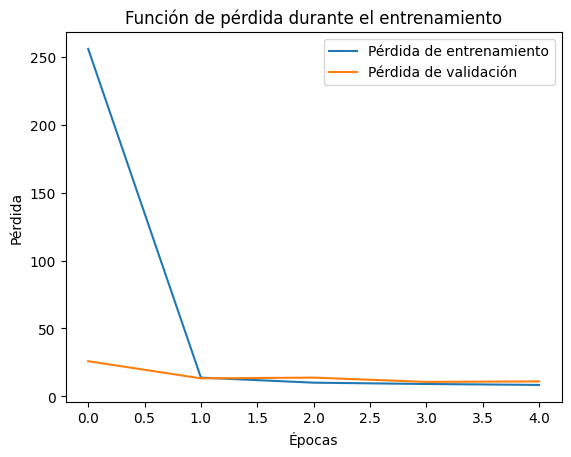

In [19]:
"""
Gráficando la funcion de pérdida
"""
import matplotlib.pyplot as plt

# Graficar la función de pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()

#### Evaluación

In [20]:
"""
Evaluar el modelo en el conjunto de prueba
"""
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Mean Absolute Error: {test_mae:.2f}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - loss: 10.4827 - root_mean_squared_error: 3.2311
Test Mean Absolute Error: 3.32


#### Predicciones

In [21]:
"""
Hacer predicciones y comparar las predicciones con los valores reales
"""
predictions = model.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
print(comparison.head())

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
     Actual  Predicted
82     23.0  23.692320
167    29.0  29.029991
356    32.4  34.285347
120    19.0  18.952253
385    38.0  38.682545


""" Otras metricas """

In [22]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, predictions)
print(f'R²: {r2}')

mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')

R²: 0.8407297607179143
MSE: 11.040975370850527
